In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from src.DCT import *

## Q1: Part 1: Plot 1D DCT basis functions

#### 1.a) Construct the Basis

In [2]:
N = 32

In [3]:
DCT_1 = np.zeros((N,N))
for k in range(N):
    for n in range(N):
        phi = generateDCTbasis(k, n, N)
        DCT_1[k, n] = phi

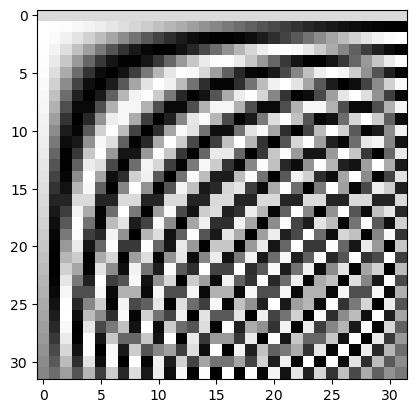

In [4]:
plt.imshow(DCT_1, cmap='grey')
plt.show()

In [5]:
F = np.matmul(DCT_1, DCT_1.T) - np.identity(N)
F_norm = np.linalg.norm(F, ord='fro')
print(f"""Frobenius Norm: {F_norm}, which is basically 0 theoretically""")

Frobenius Norm: 1.887632891042719e-14, which is basically 0 theoretically


#### 1.b) Visualize basis functions

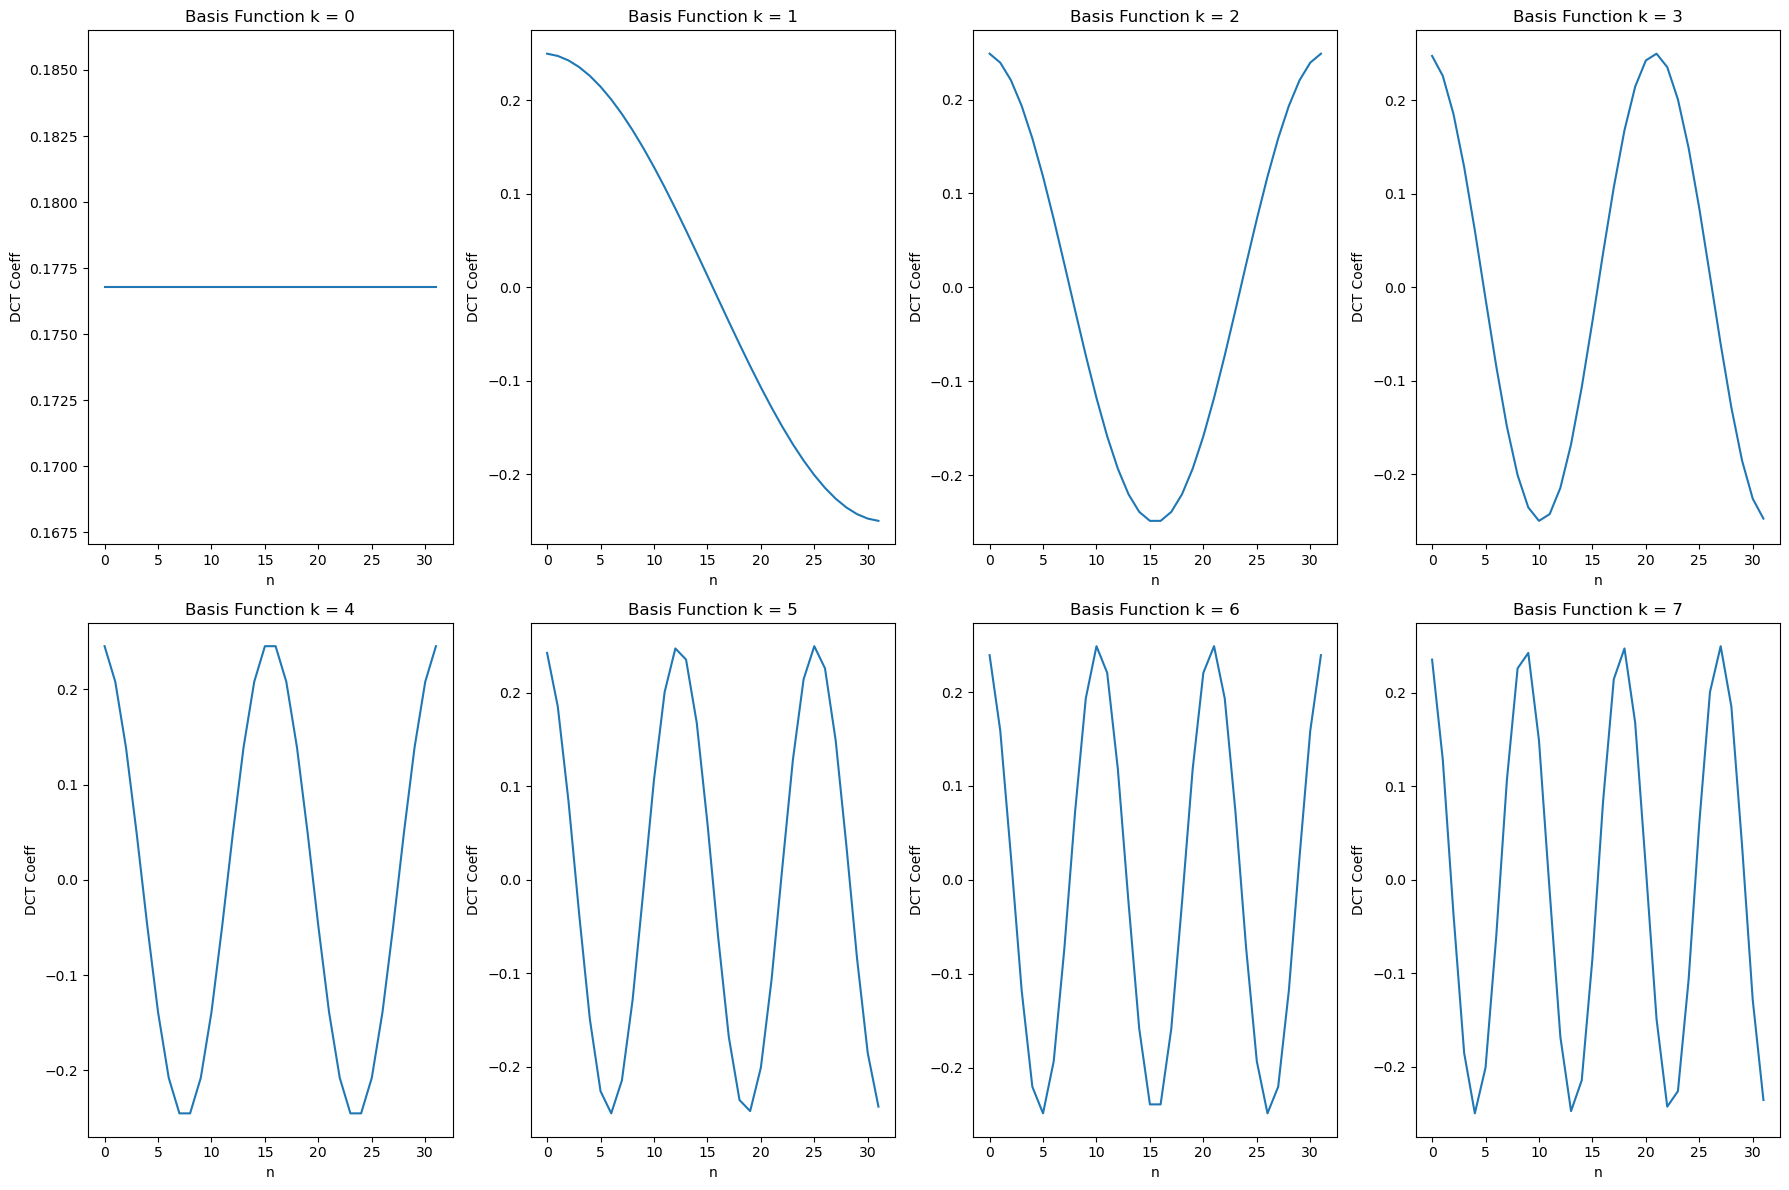

In [6]:
fig,axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
x = np.linspace(0, 31, 32)

for i in range(8):
    plot_idx_x, plot_idx_y = i // 4, i % 4

    axes[plot_idx_x, plot_idx_y].plot(x, DCT_1[i, :])
    axes[plot_idx_x, plot_idx_y].set_xlabel("n")
    axes[plot_idx_x, plot_idx_y].set_ylabel("DCT Coeff")
    axes[plot_idx_x, plot_idx_y].set_title(f"""Basis Function k = {i}""")

plt.tight_layout()
plt.show()


## Q2. Part 2: Plot 2D DCT basis Functions

#### 2.a) Seperable 2D Basis

In [7]:
### Function Definition Code in the src.DCT.py file

#### 2.b) Visualize full 8x8 set

In [8]:
M = 8
N = 8

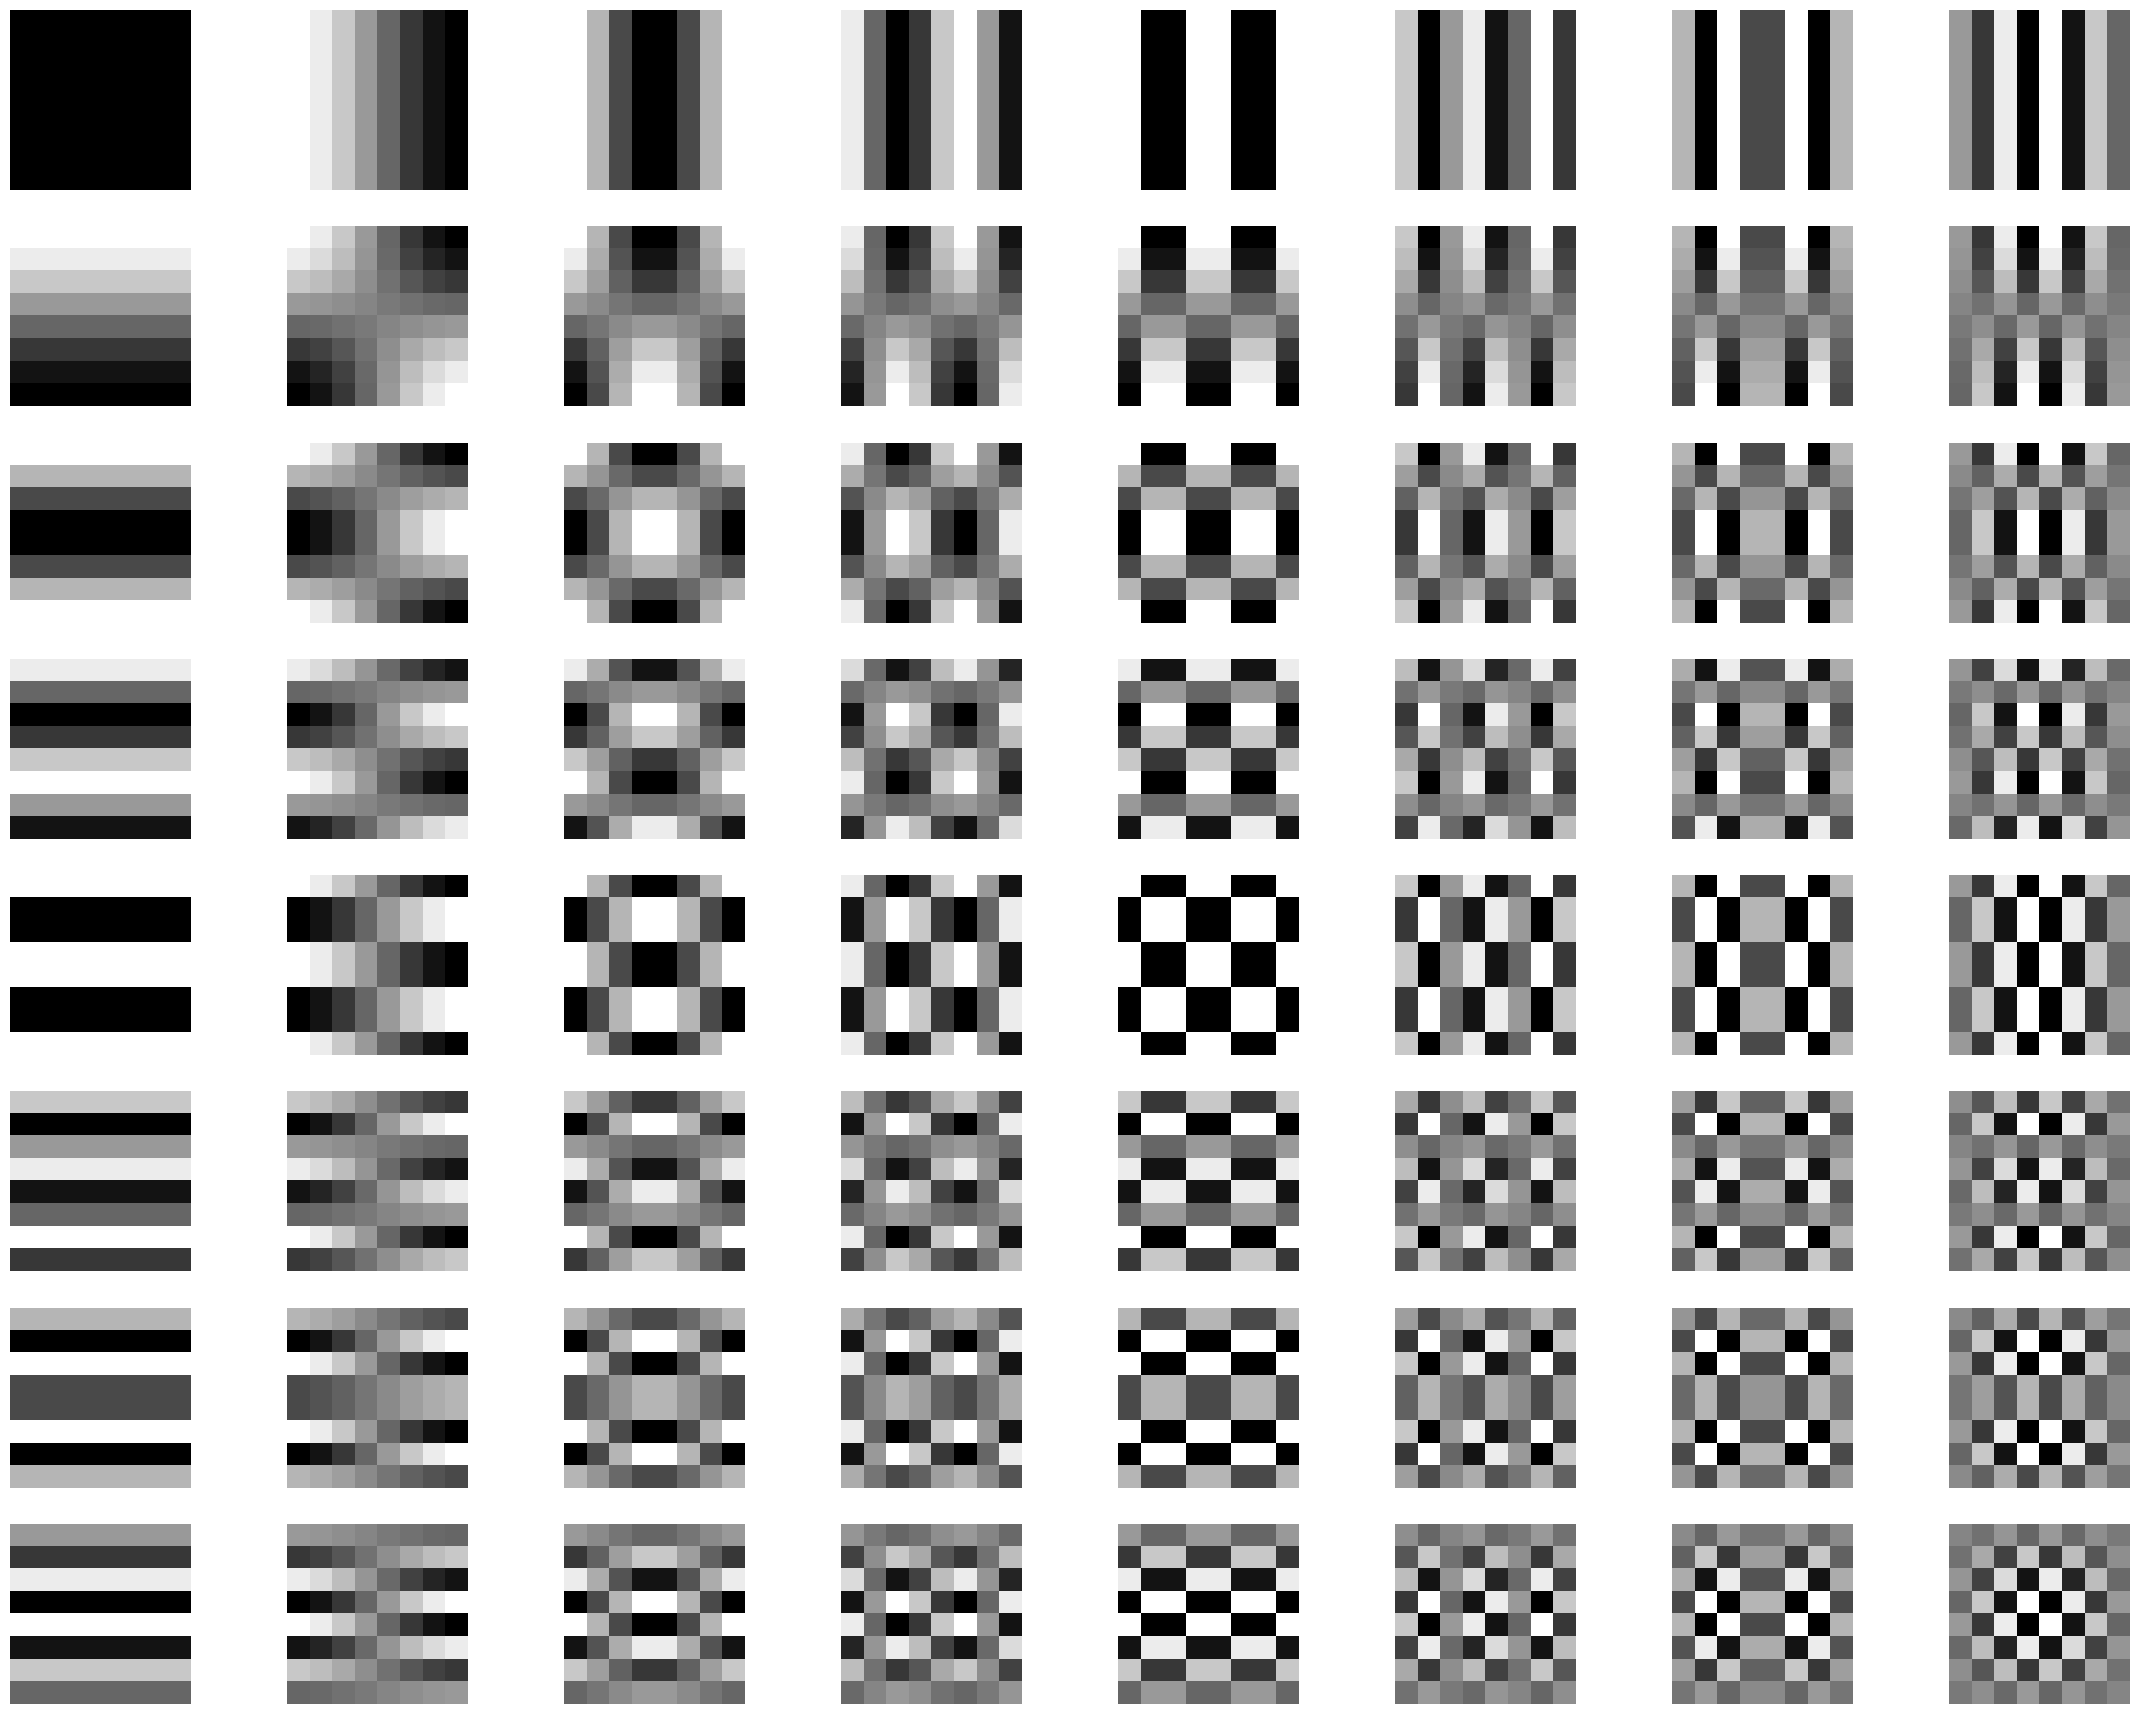

In [9]:
fig,axes = plt.subplots(nrows=8, ncols=8, figsize=(28, 22))
DCT_basis_2D = np.zeros((M, N), dtype = object)

for u in range(M):
    for v in range(N):
        DCT = generateDCTBasis2D(u, v, M, N)
        DCT_basis_2D[u, v] = DCT
        axes[u, v].imshow(DCT, cmap = "gray")
        axes[u, v].axis("off")

#### 2.c) 2D DCT on Image Blocks

In [10]:
img_8 = np.array(Image.open("image/smile.png").convert('L').resize((8,8)))

In [11]:
recon_img_8, img_8_DCT, _ = quantizeImage(img_8, DCT_basis_2D, compressionStrength = 0)

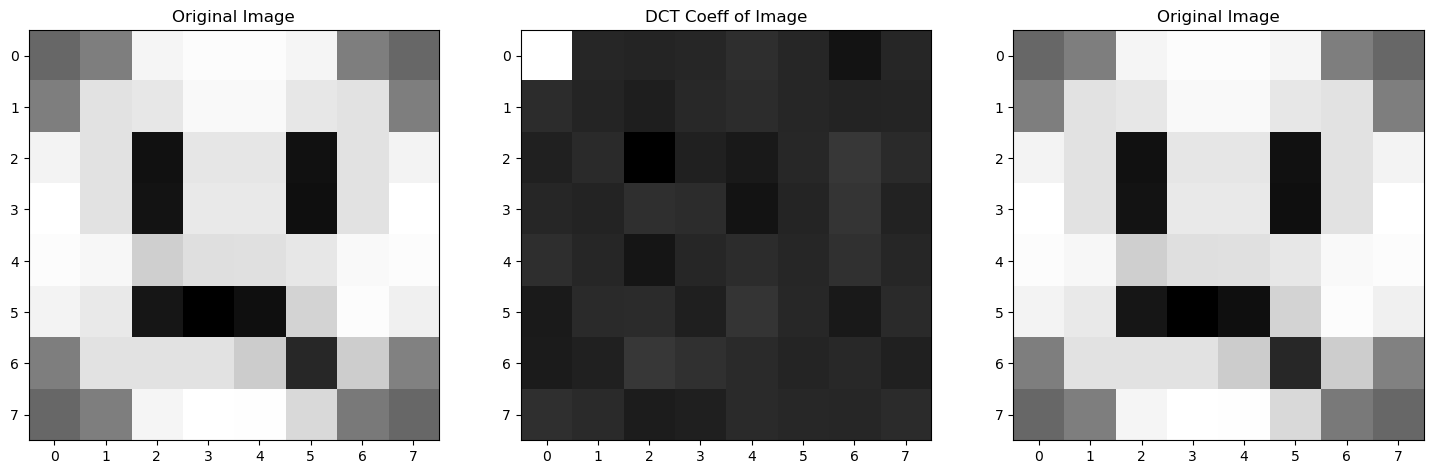

In [12]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 12))

axes[0].imshow(img_8, cmap = 'gray')
axes[0].set_title("Original Image")
axes[1].imshow(img_8_DCT, cmap = 'gray')
axes[1].set_title("DCT Coeff of Image")
axes[2].imshow(recon_img_8, cmap = 'gray')
axes[2].set_title("Original Image")

plt.show()

In [13]:
error = computeMAE(img_8, recon_img_8)
print(f"""Max absolute error between the Original Image and Reconstructed Image is : {error} """)
print(f"""In Computer terms, this is same as equal to {np.floor(error)}""")

Max absolute error between the Original Image and Reconstructed Image is : 8.242295734817162e-13 
In Computer terms, this is same as equal to 0.0


## Q3: Implement JPEG style compression

#### 3.a) Block DCT and reconstruction (no quantization)

In [14]:
img_256 = np.array(Image.open("image/cameraman.tif").convert('L'))
compressionStrength = 0

In [15]:
recon_256_img, img_256_DCT, _ = quantizeImage(img_256, DCT_basis_2D, compressionStrength)

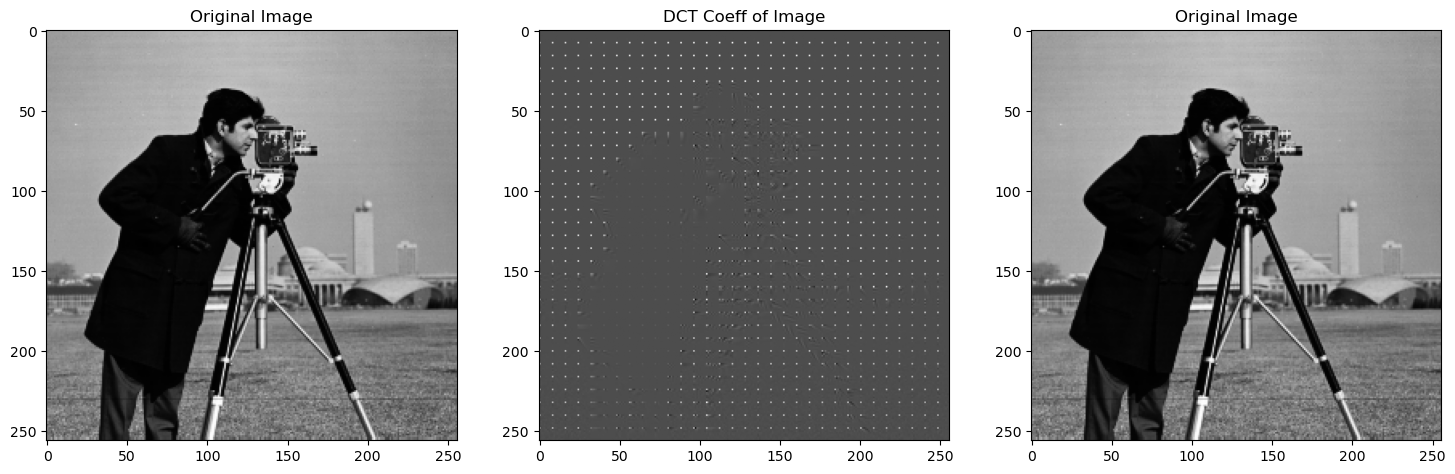

In [16]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 12))

axes[0].imshow(img_256, cmap = 'gray')
axes[0].set_title("Original Image")
axes[1].imshow(img_256_DCT, cmap = 'gray')
axes[1].set_title("DCT Coeff of Image")
axes[2].imshow(recon_256_img, cmap = 'gray')
axes[2].set_title("Original Image")

plt.show()

In [17]:
error = computeMAE(img_256, recon_256_img)
print(f"""Max absolute error between the Original Image and Reconstructed Image is : {error} """)
print(f"""In Computer terms, this is same as equal to {np.floor(error)}""")

Max absolute error between the Original Image and Reconstructed Image is : 1.2789769243681803e-12 
In Computer terms, this is same as equal to 0.0


#### 3. bcd) Quantization and Quantization vs Compression Study

For Compression Strength: 1 | PSNR: 42.40175098772035 | SPARSITY: 0.6114501953125
For Compression Strength: 3 | PSNR: 36.025805321119144 | SPARSITY: 0.7687530517578125
For Compression Strength: 6 | PSNR: 32.41955951733196 | SPARSITY: 0.8487396240234375
For Compression Strength: 12 | PSNR: 29.456819778721552 | SPARSITY: 0.906707763671875
For Compression Strength: 24 | PSNR: 27.061120143027093 | SPARSITY: 0.94207763671875


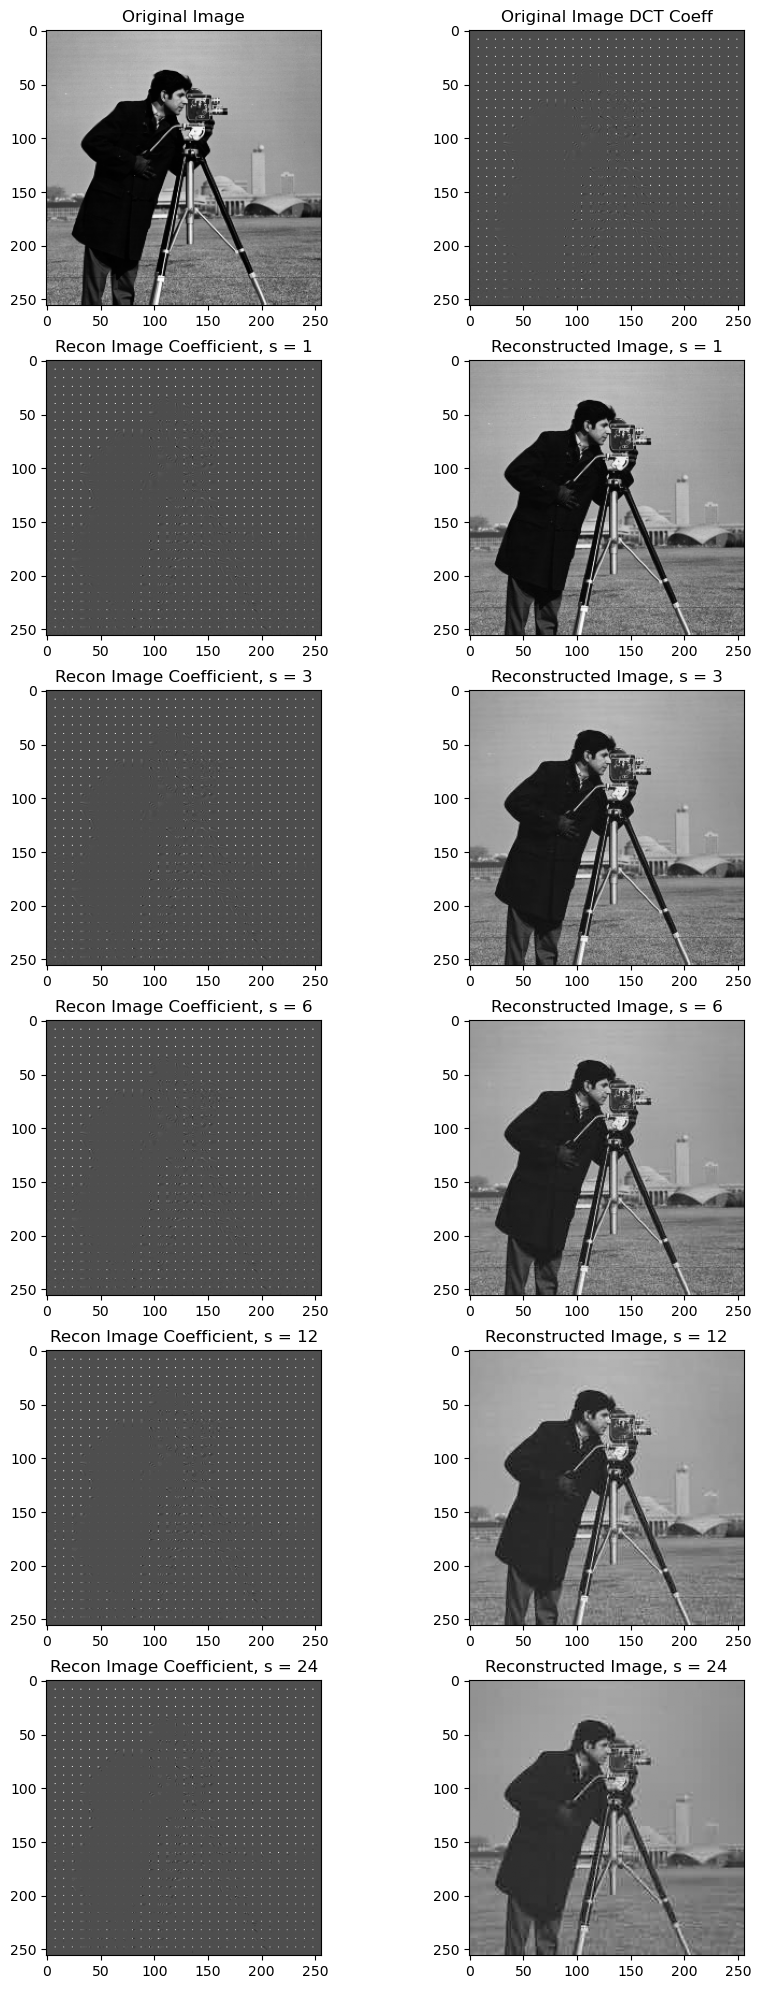

In [18]:
compressionStrength_list = [1, 3, 6, 12, 24]
PSNR_list = []
Sparsity_list = []
fig,axes = plt.subplots(nrows=len(compressionStrength_list) + 1, ncols=2, figsize=(10, 25))

for i in range(len(compressionStrength_list)):
    recon_img, img_DCT, img_recon_coeff = quantizeImage(img_256, DCT_basis_2D, compressionStrength_list[i])
    psnr = computePSNR(img_256, recon_img)
    sparsity = computeSparsity(img_recon_coeff)
    PSNR_list.append(psnr)
    Sparsity_list.append(sparsity)

    print(f"""For Compression Strength: {compressionStrength_list[i]} | PSNR: {psnr} | SPARSITY: {sparsity}""")
    if i == 0:
        axes[0, 0].imshow(img_256, cmap = 'gray')
        axes[0, 0].set_title(f"""Original Image""")
        axes[0, 1].imshow(img_DCT, cmap = 'gray')
        axes[0, 1].set_title(f"""Original Image DCT Coeff""")
    axes[i+1, 0].imshow(img_recon_coeff, cmap = 'gray')
    axes[i+1, 0].set_title(f"""Recon Image Coefficient, s = {compressionStrength_list[i]}""")
    axes[i+1, 1].imshow(recon_img, cmap = 'gray')
    axes[i+1, 1].set_title(f"""Reconstructed Image, s = {compressionStrength_list[i]}""")



    

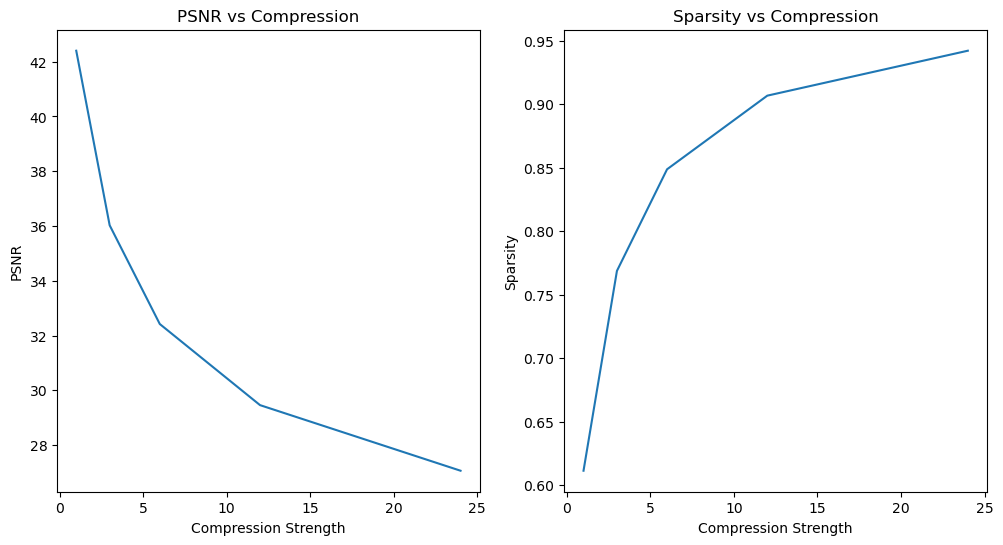

In [19]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].plot(compressionStrength_list, PSNR_list)
axes[0].set_title("PSNR vs Compression")
axes[0].set_xlabel("Compression Strength")
axes[0].set_ylabel("PSNR")
axes[1].plot(compressionStrength_list, Sparsity_list)
axes[1].set_title("Sparsity vs Compression")
axes[1].set_xlabel("Compression Strength")
axes[1].set_ylabel("Sparsity")

plt.show()



#### 3.e) Energy Compaction

In [20]:
K = 8
M, N = img_DCT.shape

Etotal = []
Elow_K = np.zeros(K)
Ehigh_K = np.zeros(K)

for u in range(0, M, 8):
    for v in range(0, N, 8):
        
        DCT_block = img_DCT[u:u+8, v:v+8]
        Etotal = np.sum(DCT_block ** 2)
        if Etotal > 0:
            for k in range(K):
                Elow_K[k] += np.sum(DCT_block[0:k, 0:k] ** 2) / Etotal
                Ehigh_K[k] += np.sum(DCT_block[7-k:8, 7-k:8] ** 2) / Etotal
Elow_K = Elow_K / 1024
Ehigh_K = Ehigh_K / 1024

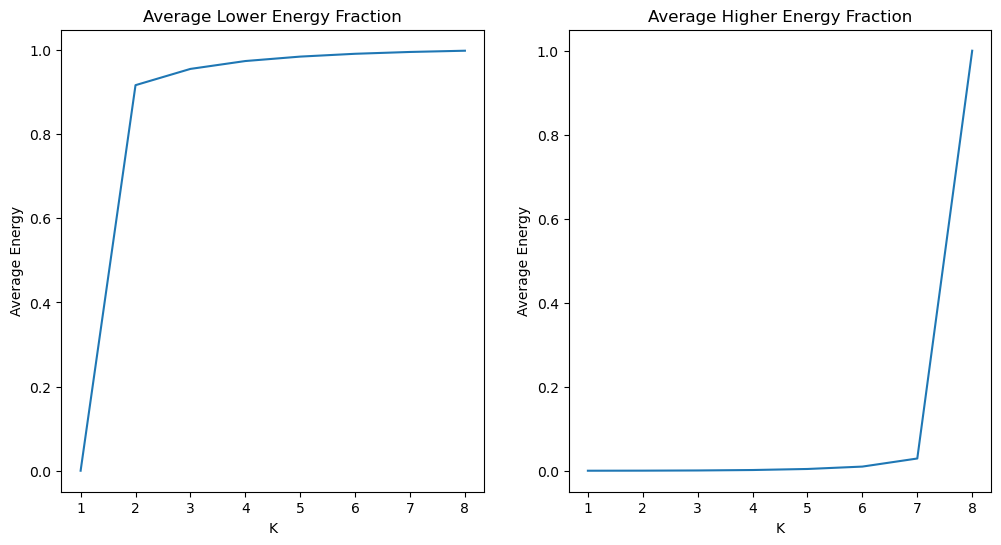

In [21]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].plot(range(1, K+1), Elow_K)
axes[0].set_title("Average Lower Energy Fraction")
axes[0].set_xlabel("K")
axes[0].set_ylabel("Average Energy")
axes[1].plot(range(1, K+1), Ehigh_K)
axes[1].set_title("Average Higher Energy Fraction")
axes[1].set_xlabel("K")
axes[1].set_ylabel("Average Energy")

plt.show()